Previously we could entangle two qubits by placing the control qubit in the state of superposition, |+>.

What if the target qubit is in the state of superposition??

In [2]:
import qiskit
from qiskit import QuantumCircuit, assemble, execute, Aer, transpile
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

In [2]:
qc=QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

In the circuit above, CNOT is acting on the state |++>, which is given as, 
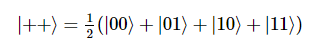

Previously, CNOT had acted on the state |0+> (where the control qubit was in the state |+> and the target qubit was in the state |0>)<br>
which is given as,
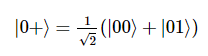

In [7]:
qc=QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

In [4]:
svsim=Aer.get_backend('aer_simulator')
qc.save_statevector()
final_state=svsim.run(transpile(qc, svsim)).result().get_statevector()

In [10]:
array_to_latex(final_state, prefix="\\text{Statevector =}")

<IPython.core.display.Latex object>

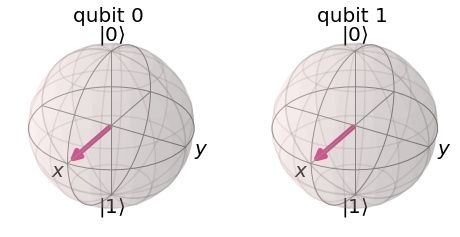

In [11]:
plot_bloch_multivector(final_state)

Since the CNOT gate swaps amplitudes of |01> and |11>, in this case we see no change.

What if the target qubit is set to the state |->?

In [12]:
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

The above circuit creates the following state vector,
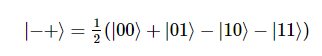

In [13]:
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()
qc1=qc.copy()
qc1.save_statevector()
final_state=svsim.run(transpile(qc1, svsim)).result().get_statevector()

In [14]:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

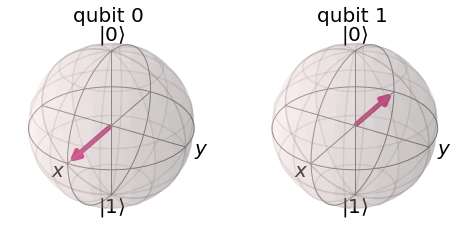

In [15]:
plot_bloch_multivector(final_state)

Now that the state is |-+>, acting CNOT on this state will swap the amplitudes of |01> and |11>

In [16]:
qc.cx(0,1)
qc.draw()
qc.save_statevector()
final_state=svsim.run(transpile(qc, svsim)).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

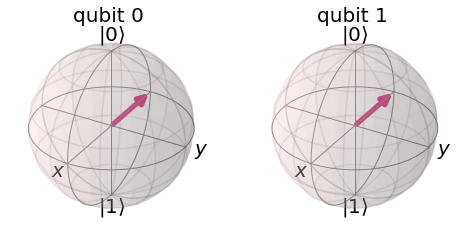

In [17]:
plot_bloch_multivector(final_state)

Wrapping the CNOT in H-gates has the equivalent behaviour of a CNOT acting in the opposite direction.

In [24]:
qc=QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
qc.draw()

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

In [25]:
usim=Aer.get_backend('aer_simulator')
qc.save_unitary()
final_state=usim.run(transpile(qc, usim)).result().get_unitary()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [26]:
qc=QuantumCircuit(2)
qc.cx(1,0)
qc.draw()
qc.save_unitary()
final_state=usim.run(transpile(qc, usim)).result().get_unitary()
array_to_latex(final_state, prefix="\\text{Statevector = }\n")

<IPython.core.display.Latex object>

__Phase Kickback__

Kickback is where the eigenvalue added by a gate is kicked back to a different qubit via a controlled operation.<br>
Perfoming an X-gate on a |-> gives it the phase -1 as
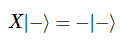
This is a global phase

When our control qubit is in the state of either |0> or |1>, whole state is affected by the phase. <br>
However, this is the global phase and hence has no observable effects.
The global phase change looks like this,
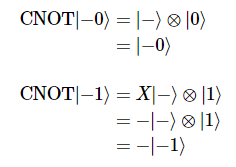

Now that the control qubit is in the superposition state, either |+> or |->, the component of the control qubit that lies in the direction of |1> applies the phase factor to the corresponding target qubit. However, the control qubit in the direction of |0> has no change in the phase factor.<br>
So, this phase factor introduced by the component of qubit in superposition in the direction of |1> introduces the relative phase into the control qubit.
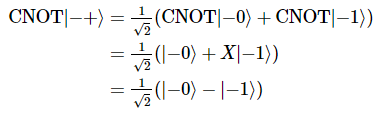
<br>
This can be written as the two separable qubit states,
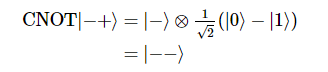

This property of phase kickback forms the foundations of many important quantum algorithms.

__Kickback with the T-gate__

In [31]:
qc=QuantumCircuit(2)
qc.cp(pi/4, 0,1)
qc.draw()

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

In [32]:
qc.save_unitary()
final_state=usim.run(transpile(qc, usim)).result().get_unitary()
array_to_latex(final_state, prefix="\\text{Controlled T-gate = }")

<IPython.core.display.Latex object>

Similarly, the Controlled U looks like, 
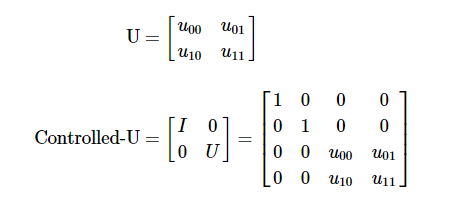

As we had seen earlier in the case of CNOT gate, applying the T-gate to a qubit in the state |1> adds a phase of e^(ipi/4) to the qubit.
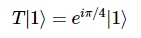
However, since this is a global phase, it is unobservable. <br>
If this operation is controlled with the control qubit in state |+>, the phase is no longer global. It changes to the relative phase in control qubit. <br>
Now the operation looks like,
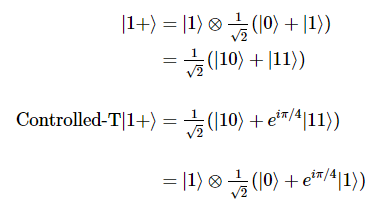

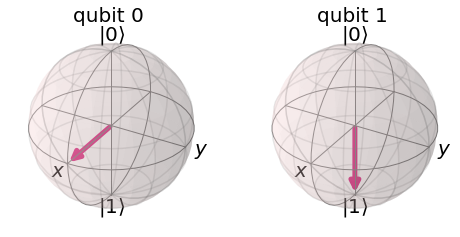

In [33]:
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()
qc.save_statevector()
final_state=svsim.run(transpile(qc, svsim)).result().get_statevector()
plot_bloch_multivector(final_state)

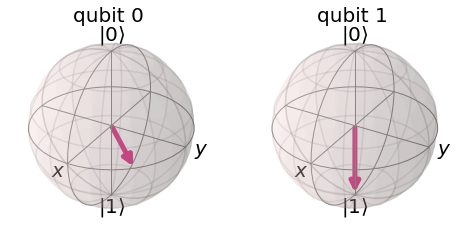

In [36]:
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(pi/4, 0, 1)
qc.draw()
qc.save_statevector()
final_state=svsim.run(transpile(qc, svsim)).result().get_statevector()
plot_bloch_multivector(final_state)

Here we saw that the qubit on left is rotated by pi/4 around the Z-axis of Bloch sphere.

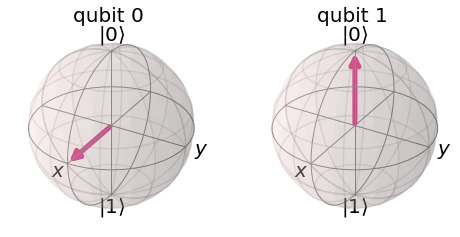

In [37]:
qc=QuantumCircuit(2)
qc.h(0)
qc.cp(pi/4, 0, 1)
qc.draw()
qc.save_statevector()
final_state=svsim.run(transpile(qc, svsim)).result().get_statevector()
plot_bloch_multivector(final_state)

This also intuitively tells that the target qubit has to be in the state of |1>. <br> If it is in the |0> state, there will be no change in the control bit and the effect can't be observed.

In [38]:
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(pi/4, 0, 1)
qc.draw()

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ X ├─■───────
     └───┘